<a href="https://colab.research.google.com/github/WillianFranco17/BootcampCT/blob/main/02Notebook_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==3.1.0a0

In [3]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [4]:
def translateComment(strComment:str):
  translator = Translator()
  strEngComment = translator.translate(strComment, src="es", dest="en")
  return strEngComment.text

def getPolarity(strComment:str):
  strComment = translateComment(strComment)
  analysis = TextBlob(strComment)
  return analysis.sentiment.polarity

from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/BOOTCAMP/Comentarios.csv'
df = pd.read_csv(ruta)
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv('resultados.csv', index=False)

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [6]:
#Clasificar de manera positiva, negativa o neutral cada uno de los comentarios
positivos = df[df['polaridad'] > 0].shape[0]
negativos = df[df['polaridad'] < 0].shape[0]
neutros = df[df['polaridad'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")

Comentarios positivos: 43
Comentarios negativos: 28
Comentarios neutros: 0


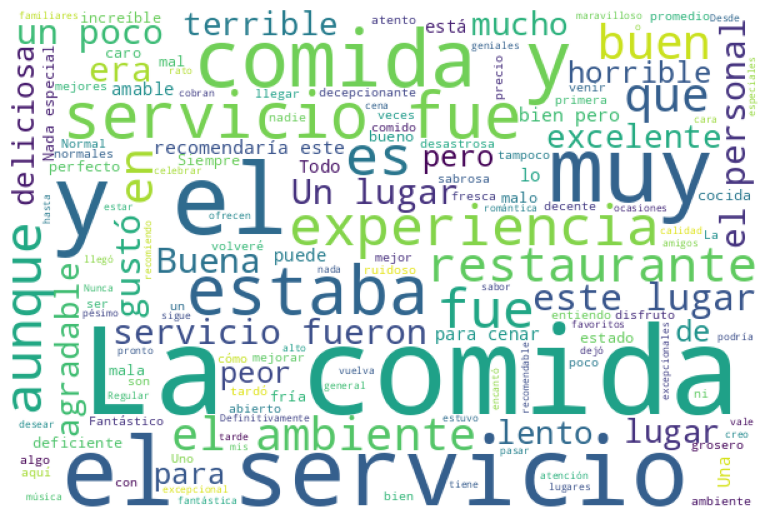

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
# Función casificar el sentimiento
def classifySentiment(polarity: float):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicando la función de polaridad y clasificar el sentimiento
df['polaridad'] = df['Comentario'].apply(getPolarity)  # Aplica función de polaridad
df['sentimiento'] = df['polaridad'].apply(classifySentiment)

#Guardar dataframe con nueva columna
df.to_csv('resultadostotal.csv', index=False)

In [9]:
display(df)

,Comentario,polaridad,sentimiento
0,La comida fue excelente y el servicio fue exce...,0.555556,Positivo
1,El ambiente era agradable y la comida estaba d...,0.261458,Positivo
2,"La comida estaba bien, pero el servicio fue le...",0.200000,Positivo
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000,Negativo
4,El peor restaurante en el que he estado. No lo...,-1.000000,Negativo
...,...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167,Positivo
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833,Positivo
68,"La comida está bien, pero el ambiente no es mu...",0.208974,Positivo
69,No me gustó la comida y el servicio fue muy de...,-0.520000,Negativo


<ipython-input-10-f2c3fb4a305b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


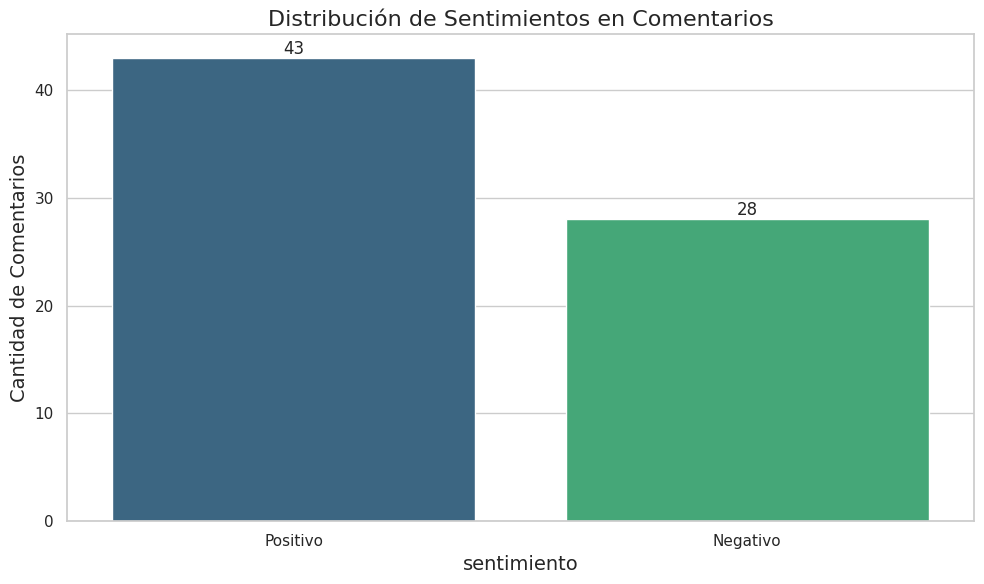

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# cuenta cantidad de comentarios en cada categoría de sentimiento
sentiment_counts = df['sentimiento'].value_counts()

#grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribución de Sentimientos en Comentarios', fontsize=16)
plt.xlabel('sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)

# valores en las barras
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# GRAFICO
plt.tight_layout()
plt.show()